## Import Library

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.preprocessing import LabelEncoder

## Loading Dataset

In [2]:
df = pd.read_csv('sms_spam.csv')
df

,Unnamed: 0,v1,v2
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
5567,5567,spam,This is the 2nd time we have tried 2 contact u...
5568,5568,ham,Will _ b going to esplanade fr home?
5569,5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,5570,ham,The guy did some bitching but I acted like i'd...


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   v1          5572 non-null   object
 2   v2          5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


**Count Unique Value**

In [4]:
unique_counts = df.nunique()
unique_counts

Unnamed: 0    5572
v1               2
v2            5168
dtype: int64

**Detect and remove Duplicate Value**

In [5]:
df.duplicated().sum()
print(f"Total number of duplicate value : {df.duplicated().sum()}")

Total number of duplicate value : 0


In [6]:
df = df.drop_duplicates(keep='first')
df.shape

(5572, 3)

**Bar plot of Ham and Spam message distribution**

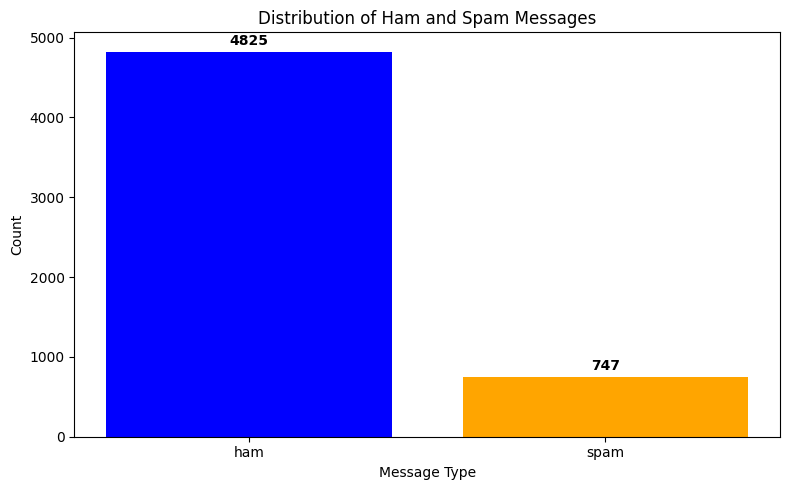

In [7]:
# Get value counts
counts = df['v1'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(counts.index, counts.values, color=['blue', 'orange'])

# Add labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             yval + 50,   # shift label slightly above bar
             str(yval),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Ham and Spam Messages')
plt.tight_layout()
plt.show()

**Pie chart of Ham and Spam message distribution**

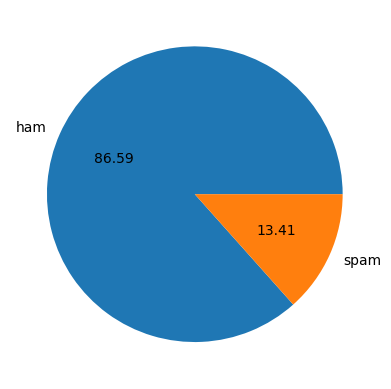

In [8]:
plt.pie(df['v1'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

**Counting number of characters, number of words and number of sentences for each message**

In [9]:
df['Number_of_Characters'] = df['v2'].apply(len)
df['Number_of_Words'] = df['v2'].apply(lambda x: len(nltk.word_tokenize(x)))
df['Number_of_Sentences'] = df['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [10]:
df

,Unnamed: 0,v1,v2,Number_of_Characters,Number_of_Words,Number_of_Sentences
0,0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,ham,Ok lar... Joking wif u oni...,29,8,2
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,3,ham,U dun say so early hor... U c already then say...,49,13,1
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...,...
5567,5567,spam,This is the 2nd time we have tried 2 contact u...,159,35,4
5568,5568,ham,Will _ b going to esplanade fr home?,36,9,1
5569,5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


**Summary Statistics of Number of Characters, Words, and Sentences**

In [11]:
df[['Number_of_Characters','Number_of_Words','Number_of_Sentences']].describe()

,Number_of_Characters,Number_of_Words,Number_of_Sentences
count,5572.000000,5572.000000,5572.000000
mean,79.906138,18.688442,1.997487
std,59.550624,13.744907,1.521813
min,2.000000,1.000000,1.000000
25%,35.000000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


**Summary Statistics of Number of Characters, Words, and Sentences for Ham Messages**

In [12]:
df[df['v1'] == "ham"][['Number_of_Characters','Number_of_Words','Number_of_Sentences']].describe()

,Number_of_Characters,Number_of_Words,Number_of_Sentences
count,4825.000000,4825.000000,4825.000000
mean,70.915855,17.262383,1.837513
std,57.990345,13.989423,1.454008
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


**Summary Statistics of Number of Characters, Words, and Sentences for Spam Messages**

In [13]:
df[df['v1'] == 'spam'][['Number_of_Characters','Number_of_Words','Number_of_Sentences']].describe()

,Number_of_Characters,Number_of_Words,Number_of_Sentences
count,747.000000,747.000000,747.000000
mean,137.975904,27.899598,3.030790
std,28.940995,6.871032,1.545681
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


In [14]:
label_encoder = LabelEncoder()

df['v1'] = label_encoder.fit_transform(df['v1'])
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.rename(columns={'v1':'Type','v2':'Message'},inplace=True)

df.head()

,Type,Message,Number_of_Characters,Number_of_Words,Number_of_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


**Distribution of Numeric Features in the Dataset**

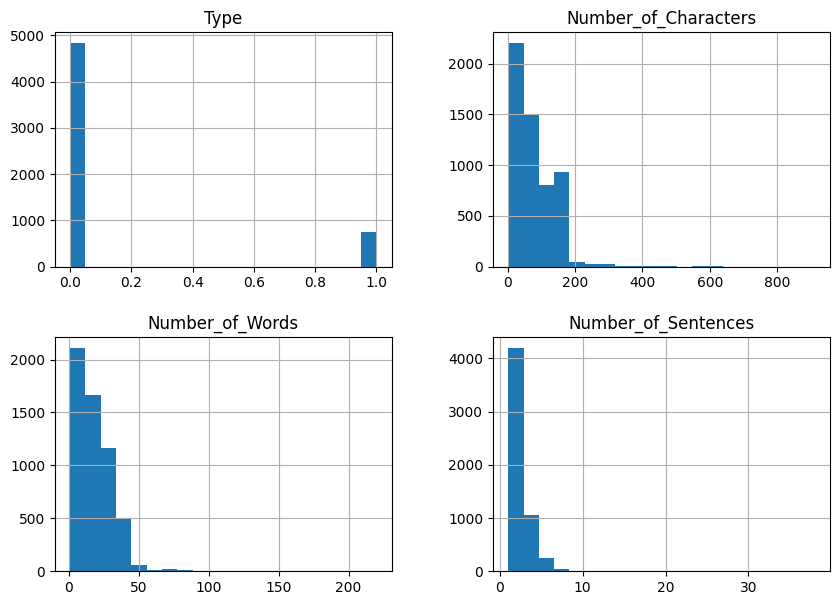

In [15]:
df.hist(bins=20, figsize=(10, 7))
plt.show()

In [16]:
df_1=df.drop(columns=["Message"])

**Boxplots of Numeric Features with Outlier Counts**

Type: 747 outliers
Type
1    747
Name: count, dtype: int64 

Number_of_Characters: 68 outliers
Type
0    68
Name: count, dtype: int64 

Number_of_Words: 78 outliers
Type
0    78
Name: count, dtype: int64 

Number_of_Sentences: 670 outliers
Type
0    420
1    250
Name: count, dtype: int64 



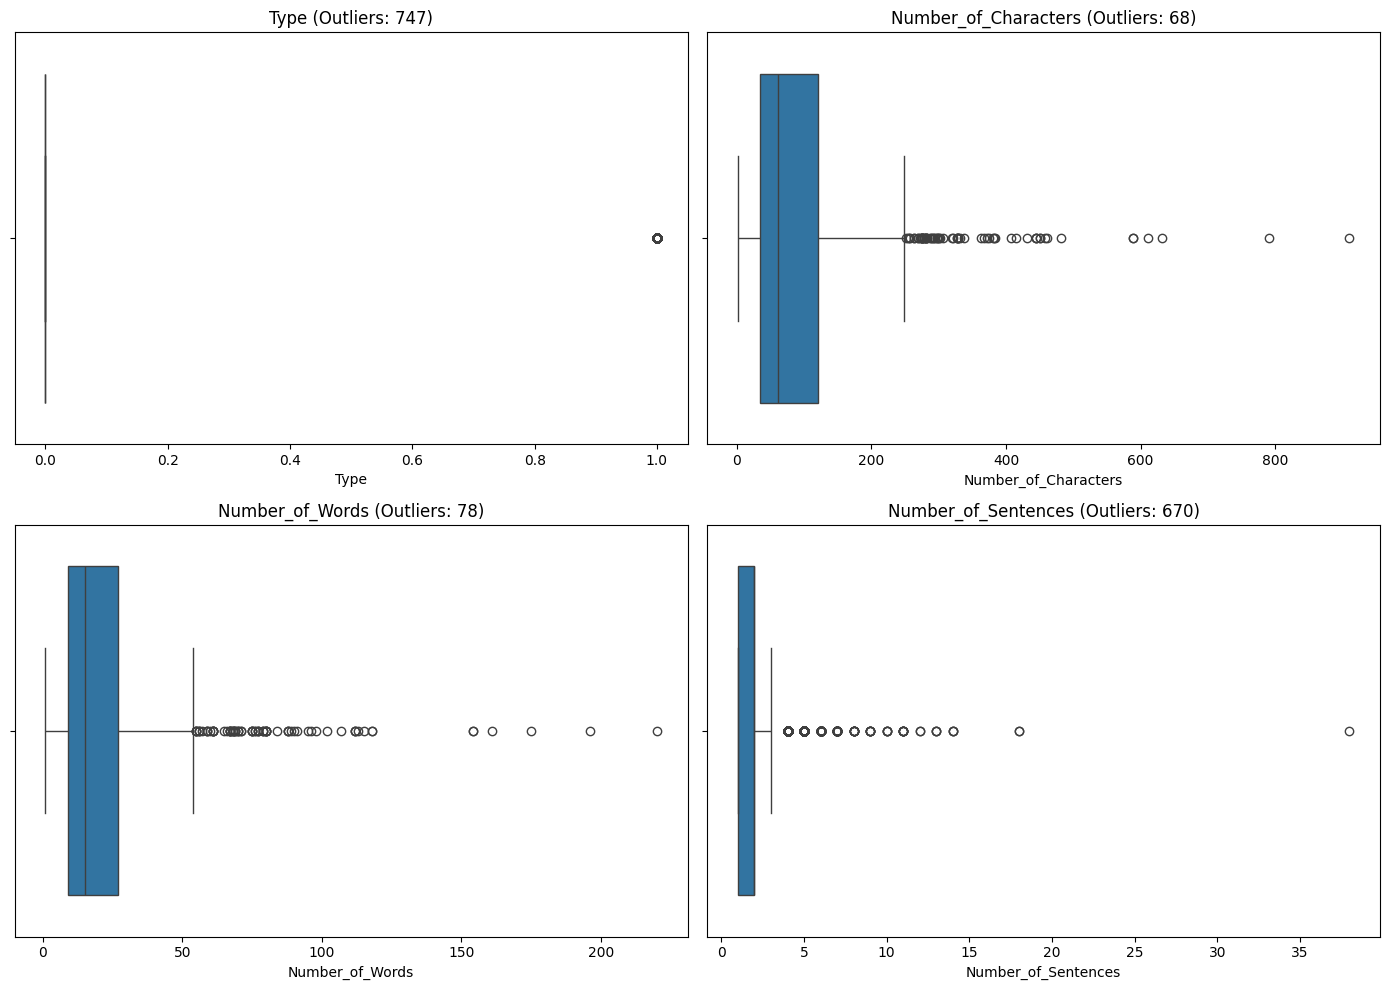

In [17]:
num_cols = df_1.select_dtypes(include='number').columns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid for 4 plots
axes = axes.flatten()  # Flatten to 1D for easy looping

for i, col in enumerate(num_cols):
    Q1 = df_1[col].quantile(0.25)
    Q3 = df_1[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Outlier condition
    outliers = df_1[(df_1[col] < Q1 - 1.5 * IQR) | (df_1[col] > Q3 + 1.5 * IQR)]
    outlier_count = outliers[col].count()
    
    # Split by Ham/Spam
    outlier_split = outliers['Type'].value_counts()
    
    # Plot boxplot in subplot
    sns.boxplot(x=df_1[col], ax=axes[i])
    axes[i].set_title(f"{col} (Outliers: {outlier_count})")
    
    # Print counts
    print(f"{col}: {outlier_count} outliers")
    print(outlier_split, "\n")

plt.tight_layout()
plt.show()


**Correlation heatmap of numerical features with annotation**

<Axes: >

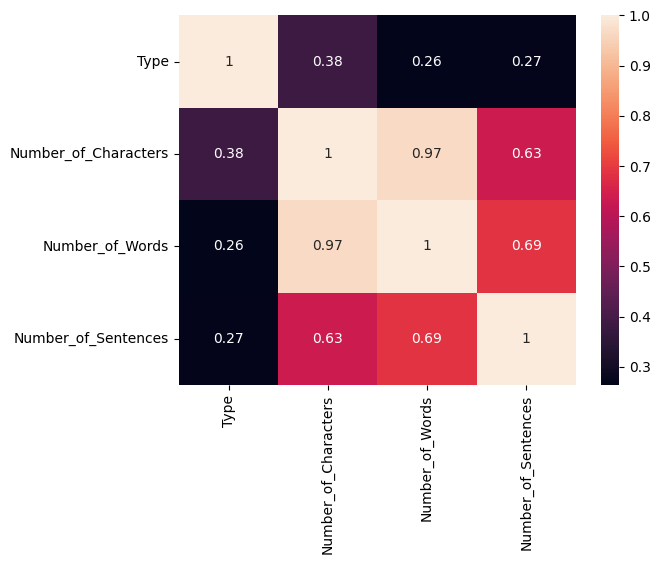

In [18]:
sns.heatmap(df_1.corr(),annot=True)

**Visual representation of word frequency**

In [19]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [20]:
spam_wc_0 = wc.generate(df[df['Type'] == 0]['Message'].str.cat(sep=" "))

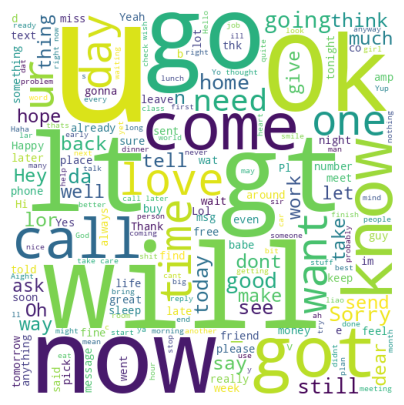

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))   # size of the figure
plt.imshow(spam_wc_0)         # show the word cloud image
plt.axis("off")             # hide axis
plt.show()


In [22]:
spam_wc_1 = wc.generate(df[df['Type'] == 1]['Message'].str.cat(sep=" "))

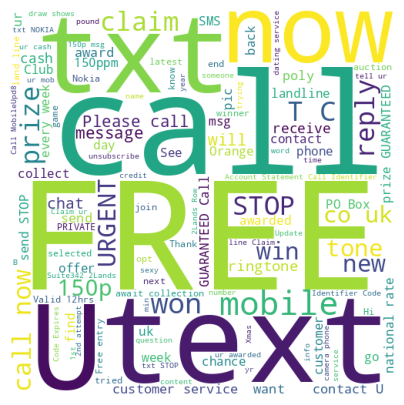

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))   # size of the figure
plt.imshow(spam_wc_1)         # show the word cloud image
plt.axis("off")             # hide axis
plt.show()